# Caixeiro Viajante - Solução por Simulated Annealing
##### Gabriel Lima Barros - 2020006531
##### Gabriel Teixeira Carvalho - 2020006558
##### Thiago Pádua de Carvalho - 2020007066

### Introdução
Nesse trabalho, exploraremos soluções para o problema do caixeiro viajante através de simulated annealing. Este é um método de otimização que se baseia no resfriamento de um sistema para que ele atinja um estado de menor energia. Nesse caso, a energia do sistema é a distância total percorrida pelo caixeiro. O resfriamento é feito através de uma função de probabilidade que depende da temperatura do sistema. A temperatura é diminuída ao longo do tempo, de forma que o sistema tende a se estabilizar em um mínimo, que pode ser local ou global.


In [ ]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()
x = []
y = []
counter = 0
with open('/content/posicoes.dat', 'r') as f:
    for line in f:
      counter += 1
      a, b = line.split()
      x.append(float(a))
      y.append(float(b))
# define o caminho que liga as cidades (inicialmente a sequencia como foi criada)
N = counter
pathini = np.zeros(N,dtype=np.int16)
for i in range(N):
    pathini[i]=i

In [ ]:
#define a distancia entre duas cidades quaisquer
@jit(nopython=True)
def distances(N,x,y):
    
    dist = np.zeros((N,N),dtype=np.float32)
    for i in range(N):
        for j in range(N):
            dist[i,j] = np.sqrt((x[i]-x[j])*(x[i]-x[j])+(y[i]-y[j])*(y[i]-y[j]))
            
    return dist

In [ ]:
@jit(nopython=True)
def custo(N,path,dist):
    # calcula a distancia total percorrida pela caminhada
    ener = 0
    for i in range(N-1):
        ener += dist[path[i],path[i+1]]
    ener += dist[path[0],path[N-1]]     # conecta a última e a primeira cidades do caminho
    
    return ener

In [ ]:
@jit(nopython=True)
def newpath(N,path):
    
    # define uma nova caminhada
    
    newpath = np.zeros(N,dtype=np.int16)

    i=np.random.randint(N)   # escolhe uma posição aleatória da caminhada
    j=i
    while j==i:
        j=np.random.randint(N)  # escolhe outra posição 
    if i>j:                    # ordena os índices
        ini = j
        fin = i
    else:
        ini = i
        fin = j

    for k in range(N):        # inverte o sentido em que percorre o caminho entre os indices escolhidos
        if k >= ini and k <= fin:
            newpath[k] = path[fin-k+ini]
        else:
            newpath[k] = path[k]

    return newpath,ini,fin



In [ ]:
@jit(nopython=True)
def mcstep(N,beta,en,path,best_e,best_p,dist):
    # realiza um passo de Monte Carlo
    np1 = np.zeros(N,dtype=np.int16)
    
    np1,ini,fin = newpath(N,path) # propoe um novo caminho
    
    # determina a diferença de energia 
    esq = ini-1         # cidade anterior a inicial
    if esq < 0: esq=N-1      # condicao de contorno
    dir = fin +1        # cidade apos a final
    if dir > N-1: dir=0      # condicao de contorno
    de = -dist[path[esq],path[ini]] - dist[path[dir],path[fin]]+ dist[np1[esq],np1[ini]] + dist[np1[dir],np1[fin]]

    if de < 0:         # aplica o criterio de Metropolis
        en += de
        path = np1
        if en < best_e:  # guarda o melhor caminho gerado até o momento
            best_e = en
            best_p = path
    else:              # aplica o criterio de Metropolis
        if np.random.random() < np.exp(-beta*de):
            en += de
            path = np1
            
    return en,path,best_e,best_p,de

In [ ]:
def plot_energy(energies):
    # plota a energia por passo de Monte Carlo
    plt.plot(energies)
    plt.xlabel('Passo de Monte Carlo')
    plt.ylabel('Energia')
    plt.show()

In [ ]:
def plot_route(cities, route, total_distance):
    x = []
    y = []
    for i in range(len(route)):
        city = cities[route[i]]
        x.append(city[0])
        y.append(city[1])
    plt.plot(x, y, 'co')
    for i in range(len(route)):
        if i == 0:
            plt.annotate(route[i], xy=(x[i], y[i]), xytext=(x[i], y[i]), color='r')
        else:
            plt.annotate(route[i], xy=(x[i], y[i]), xytext=(x[i], y[i]))
    plt.plot(x[0], y[0], 'co')
    plt.plot(x + [x[0]], y + [y[0]], 'c')
    plt.title('Total distance: ' + str(total_distance))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'x' of function 'distances'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-199-b688331af9d0>", line 3:
@jit(nopython=True)
def distances(N,x,y):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'y' of function 'distances'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-199-b688331af9d0>", line 3:
@jit(nopython=True)
def distances

62.2025488615036


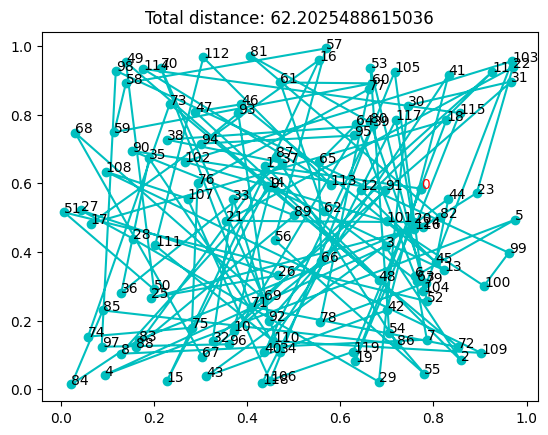

2.8523221015930176
9.500869265757501
[  0  82  24 116  20 101   3  45  13  79   6  63 104  52  42 119  78  48
  66  69  71  26  56  21  76 102  94  38  73  47  46  93   1   9  14  33
  89  62 113  91  12  37  87  65  95  64  80  39 117  30  18 115  31  22
 103  11  41 105  53  60  77  57  16  61  81 112  70 114  49  98  58  59
  68 108  90  35 107  27  51  17  28 111  50  25  75  88  83  36  85  74
  97   8  84   4  15  43  67  32  96  10  92 110  34  40 118 106  19  29
  55  86  54   7  72   2 109 100  99   5  23  44]


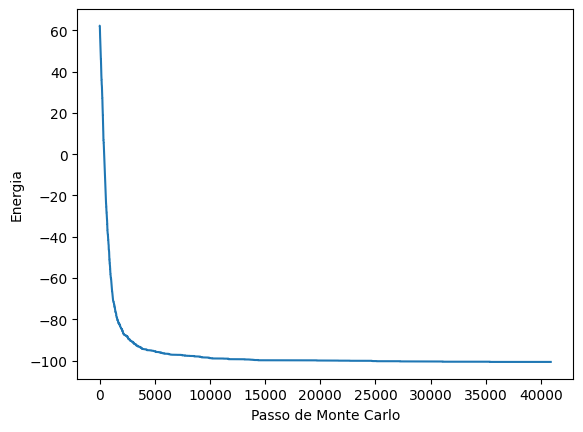

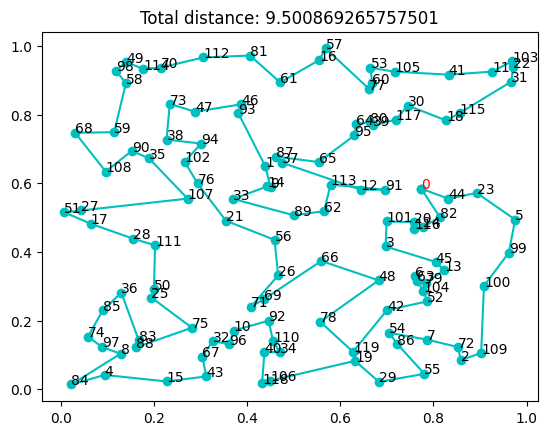

In [ ]:
dist = distances(N,x,y)  # calcula as distancias entre as cidades
best_e = custo(N, pathini, dist)
best_p = np.zeros(N,dtype=np.int16)
print(best_e) # mostra a distancia total percorrida pela caminhada inicial
plot_route(np.array([x, y]).T, pathini, custo(N, pathini, dist)) # mostra o caminho inicial

T = 10
dt = 0.99
Tf = 0.0001

energies = []
counter = 0
while T > Tf:
  for i in range(100):
    best_e,pathini,best_e,best_p,de = mcstep(N,1/T,best_e,pathini,best_e,best_p,dist)
    if counter != 0 and de < 0.00001:
      energies.append(best_e)
      break
    else:
      energies.append(best_e)
    counter += 1
  T *= dt

cost = custo(N, best_p, dist)

while best_p[0] != 0:
  best_p = np.roll(best_p, 1)

print(cost)
print(best_p)
plot_energy(energies)
plot_route(np.array([x, y]).T, best_p, cost)

### Relatório
O algoritmo começa com uma solução inicial aleatória para o problema do TSP. Em cada iteração, uma pequena perturbação é aplicada à solução atual para obter uma nova solução vizinha. Essa perturbação é feita através da inversão a ordem em que o caixeiro percorre um determinado trecho do caminho. Em seguida, é calculada a diferença de custo entre a nova solução e a solução atual.

Nesse momento introduzimos o caráter estocástico da simulação, em que a nova solução é aceita com uma probabilidade dada por uma função de probabilidade de Boltzmann. Essa função depende da temperatura do sistema e da diferença de custo entre as duas soluções. Se a nova solução for aceita, ela se torna a solução atual. Caso contrário, a solução atual permanece a mesma.

Observamos - no segundo plot - que a energia do sistema diminui bruscamente entre 1000 e 2000 passos de Monte Carlo, apresentando posteriormente queda lenta e estabilização, demonstrando que o sistema atingiu um mínimo local.

A diferença entre a primeira solução e a última observada evidencia a melhora provida pelo algoritmo. A construção do caminho via simulated annealing resultou em uma distância total percorrida aproximadamente 7 vezes menor que a percorrida pelo caminho inicial.